In [4]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
n_samples = 20000

X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.25)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [8]:
logR = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)

In [9]:
logR.fit(X_train, y_train)

d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='multinomial', solver='sag')

In [11]:
y_pred = logR.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.8130305602716469
[[151   1   0   0   1   0   1   0   4   2   0   1   1   1   0  16   1   7
    3  10]
 [  0 180  10   5  10  10   4   3   0   0   0   4   6   3   4   0   0   2
    2   0]
 [  0  14 191  12   3  10   6   0   0   0   0   1   2   1   2   2   0   0
    2   0]
 [  0  10  20 175   8   6   8   2   1   1   0   0  10   2   1   0   0   0
    1   0]
 [  1   4   5  18 196   3   6   0   1   0   1   0   4   1   0   1   0   0
    0   0]
 [  0  16  11   5   3 196   3   1   0   1   0   0   4   2   3   2   0   0
    0   0]
 [  0   0   1   7   1   2 205   4   2   2   2   0   8   4   0   1   2   1
    2   0]
 [  0   2   1   2   1   0   7 211   7   2   1   0   5   2   2   0   2   0
    2   0]
 [  1   1   0   1   0   0   7   7 217   2   3   1   1   2   1   2   0   1
    1   1]
 [  2   3   1   2   0   3   3   3   1 211  12   1   2   2   1   0   2   0
    0   0]
 [  0   0   0   1   1   2   2   0   1   2 231   0   1   2   0   3   2   0
    2   0]
 [  0   2   0   0   1   2   1   2   0   4   1 

<Axes: >

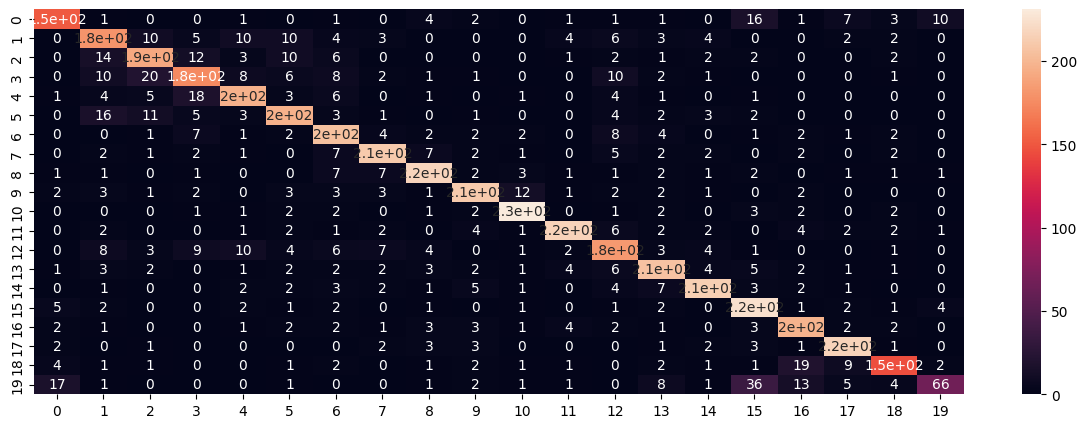

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True)